In [54]:
import pandas as pd 
import numpy as np 
import os 
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt 

In [18]:
cwd = os.getcwd()
print(cwd)

/mnt/c/Users/monta/Documents/hackED2019


In [25]:
# Read the training file the user imported as a pandas data frame

training_data = pd.read_csv('/mnt/c/Users/monta/Documents/hackED2019/data/train.csv', columns = )

TypeError: parser_f() got an unexpected keyword argument 'columns'

In [20]:
training_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
# get all the columns of interest
# Ideally get feature names as a string or list form the client 

feature_names = "1stFlrSF 2ndFlrSF GrLivArea FullBath BedroomAbvGr Fireplaces HalfBath GarageArea PoolArea YrSold LotArea OverallQual OverallCond YearBuilt"


In [37]:
# add label to list of columns to retrieve. 
"""
hard coded for now 
"""
label_name = "SalePrice"

In [43]:
columns_to_retrieve = feature_names #### +  " " + label_name

columnsList = columns_to_retrieve.split(" ")
features_df = training_data[columnsList]
features_df.head()

,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,Fireplaces,HalfBath,GarageArea,PoolArea,YrSold,LotArea,OverallQual,OverallCond,YearBuilt
0,856,854,1710,2,3,0,1,548,0,2008,8450,7,5,2003
1,1262,0,1262,2,3,1,0,460,0,2007,9600,6,8,1976
2,920,866,1786,2,3,1,1,608,0,2008,11250,7,5,2001
3,961,756,1717,1,3,1,0,642,0,2006,9550,7,5,1915
4,1145,1053,2198,2,4,1,1,836,0,2008,14260,8,5,2000


In [44]:
# want to use salePrice as validater

# use the value that the user picked as the label as our y 
y = training_data[label_name]

# split the data the user gave us into 70, 30 sets so that we can give them an indication of how accurate
# the model is 
X_train, X_test, y_train, y_test = train_test_split(features_df, y, test_size=.3)



print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 



(1022, 14) (1022,)
(438, 14) (438,)


In [49]:
# fit a model now 
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

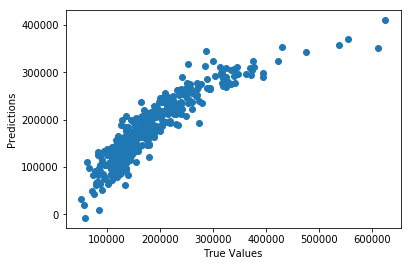

In [57]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [58]:

print("Accuracy of model: ", model.score(X_test, y_test))

Accuracy of model:  0.8071443012871472


In [59]:

X_test.head()

,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,Fireplaces,HalfBath,GarageArea,PoolArea,YrSold,LotArea,OverallQual,OverallCond,YearBuilt
1409,1236,857,2093,2,3,1,1,542,0,2008,20544,7,6,1986
859,1512,1142,2654,2,4,1,1,619,0,2006,11029,6,7,1968
676,1095,679,1774,2,4,0,0,779,0,2006,9600,4,2,1900
1340,872,0,872,1,3,0,0,480,0,2007,8294,4,5,1971
468,1634,0,1634,2,3,1,0,866,0,2007,11428,8,5,2006
